In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100
RAW_DATA_DIR = Path("data/raw/amazon")
PROCESSED_DATA_DIR = Path("data/processed/amazon")


In [2]:
def sigmoid(x, xmid, tau, top):
    """
    Sigmoid with upper limit
    """
    return top / (1.0 + np.exp(-(x - xmid) / tau))


In [3]:
def plot_adjustment_func(x, params, xmin=None, xmax=None):

    if not xmin: xmin = np.min(x)
    if not xmax: xmax = np.max(x)
    x = np.sort(x)

    Z = sigmoid(x, params['xmid'], params['tau'], params['top'])

    plt.figure(figsize=(10,5))
    plt.plot(x, Z, color='red', lw=1.)
    plt.xlim((xmin, xmax))
    plt.ylabel("views_count")
    plt.ylabel("Interest")
    plt.show()

In [4]:
df = pd.read_feather(RAW_DATA_DIR / "Movies_and_TV.f")


In [5]:
def _keep_recent_n_years(df, n_years=5):
    df["reviewDate"] = pd.to_datetime(df["unixReviewTime"], unit="s")
    start_date = df.reviewDate.max() - pd.DateOffset(years=n_years)
    df_recent = df[df.reviewDate >= start_date]
    df_recent.drop_duplicates(["reviewerID", "asin"], inplace=True, keep="last")
    return df_recent


In [6]:
df_recent = _keep_recent_n_years(df, 5)
df_recent.sort_values("reviewDate", inplace=True)

train_size = df_recent.shape[0] - round(df_recent.shape[0] * 0.2)
train_df = df_recent.iloc[:train_size]
  

<ipython-input-5-85a8c14d7145>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent.drop_duplicates(["reviewerID", "asin"], inplace=True, keep="last")
<ipython-input-6-d316cf892cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent.sort_values("reviewDate", inplace=True)


In [7]:
present = train_df.reviewDate.max() 
train_df["days_to_present"] = present - train_df["reviewDate"]
train_df['days_to_present_inv'] = (train_df.days_to_present.max() - train_df.days_to_present).dt.days


<ipython-input-7-743c715cdf6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["days_to_present"] = present - train_df["reviewDate"]
<ipython-input-7-743c715cdf6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['days_to_present_inv'] = (train_df.days_to_present.max() - train_df.days_to_present).dt.days


In [8]:
train_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewDate,days_to_present,days_to_present_inv
3352119,5,True,"10 3, 2013",AEK8ZRCXA5185,B0013LRKSA,"{'Color:': None, 'Format:': ' DVD', 'Shape:': ...",Theresa Linton,So many lessons in this film. For not only a ...,Just a great film,1380758400,None,None,2013-10-03,1120 days,0
4407143,5,True,"10 3, 2013",A2EWNYME532PMF,B004LWZW6A,"{'Color:': None, 'Format:': ' Amazon Video', '...",Christopher M. Rumley,Kids loved this movie (ages 6 and 8)..this was...,Great family movie,1380758400,None,None,2013-10-03,1120 days,0
2768814,5,True,"10 3, 2013",A31304RVFOGKV1,B000NHG7C0,"{'Color:': None, 'Format:': ' Amazon Video', '...",C. Mielzarek,this has always been one of my all time favori...,new take on an all time favorite,1380758400,None,None,2013-10-03,1120 days,0
4405974,5,True,"10 3, 2013",A2XR5HA7DM30MP,B004LVOX7K,"{'Color:': None, 'Format:': ' DVD', 'Shape:': ...",Maggs,I am so glad I bought the series. There is a l...,LOVE THIS!,1380758400,None,None,2013-10-03,1120 days,0
5737998,5,True,"10 3, 2013",A2GH77WAYK07ER,B00CSW07UQ,"{'Color:': None, 'Format:': ' DVD', 'Shape:': ...",Pa,"I don't know anyone personally, who surfs, but...","Amazing, fearless althletes.",1380758400,None,None,2013-10-03,1120 days,0


In [9]:
present

Timestamp('2016-10-27 00:00:00')

In [10]:
train_df.reviewDate.min()

Timestamp('2013-10-03 00:00:00')

In [11]:
train_df.reviewDate.max()

Timestamp('2016-10-27 00:00:00')

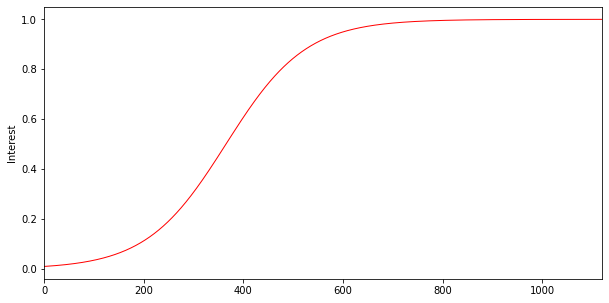

In [12]:
params = {"xmid":365, "tau":80, "top":1}
plot_adjustment_func(train_df.days_to_present_inv.values, params)

In [13]:
Z = np.round(sigmoid(train_df.days_to_present_inv.values, params['xmid'], params['tau'], params['top']), 3)

In [14]:
Z

array([0.01, 0.01, 0.01, ..., 1.  , 1.  , 1.  ])

In [15]:
np.where(Z > 0.99)[0][0]

2998954

In [16]:
train_df.iloc[2998954].days_to_present

Timedelta('383 days 00:00:00')